In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score

## Импортируем данные:

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
target = "HeartDisease"
Y = df[target]
X = pd.get_dummies(df.drop(target, axis=1))

In [ ]:
X.shape

(918, 20)

In [ ]:
Y.shape

(918,)

# Что предсказываем

In [ ]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score', 'Average_precision_score'])

## Сплитим нашу выборку 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

## Построим модель классификатора с использованием различных методов:

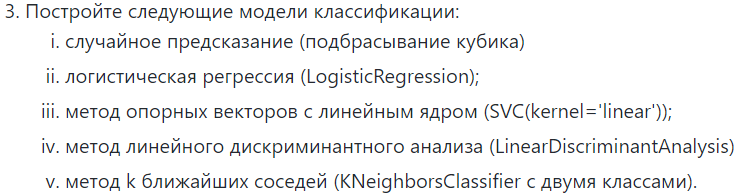

In [ ]:
import warnings
warnings.filterwarnings("ignore")

0.046454429626464844 seconds время обучения модели LogisticRegression
16.504474639892578 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.008114099502563477 seconds время обучения модели Метод линейного дискриминантного анализа
0.008781194686889648 seconds время обучения модели KNeighborsClassifier
0.5454187393188477 seconds время обучения модели Многослойный перцептрон (MLP)


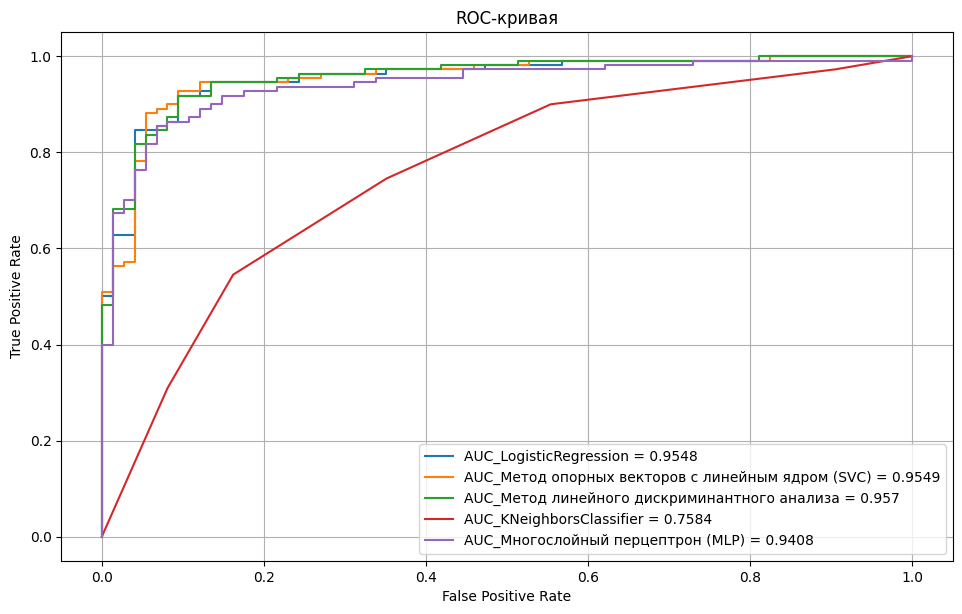

In [ ]:
# Определяем методы
learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel='linear', probability=True),
    "Метод линейного дискриминантного анализа": LinearDiscriminantAnalysis(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter=300) 
}

# Построим график ROC-кривой
plt.figure(figsize=(11.5, 7), dpi=100)

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
                 
    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average='macro'),
                         recall_score(y_test, model.predict(x_test), average='macro'),
                         f1_score(y_test, model.predict(x_test), average='macro'),
                         average_precision_score(y_test, y_score)]
    
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba((x_test))
    probs = y_pred_proba[:, 1]
    fpr, tpr, treshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'AUC_{name} = {round(roc_auc,4)}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.title('ROC-кривая')
    i += 1

plt.show()         

**Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;**

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Average_precision_score
0,LogisticRegression,0.902174,0.899802,0.896069,0.897816,0.970807
1,Метод опорных векторов с линейным ядром (SVC),0.907609,0.904665,0.902826,0.903715,0.970116
2,Метод линейного дискриминантного анализа,0.902174,0.899802,0.896069,0.897816,0.972114
3,KNeighborsClassifier,0.706522,0.695419,0.697052,0.696147,0.781862
4,Многослойный перцептрон (MLP),0.885870,0.883522,0.878010,0.880501,0.963440


## Вычислим метрику accuracy на тренировочном датасете для Логистической регрессии:

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.8623978201634878

## Вычислим метрику accuracy на тестовом датасете для Логистической регрессии:

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9021739130434783

## Алгоритм логистической регрессии позволяет получить не только предсказанную метку класса, но и вероятность принадлежности этому классу. Эти вероятности можно получить с помощью метода .predict_proba:

In [ ]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba((x_test))
y_pred_proba[:5,:]

array([[0.24425728, 0.75574272],
       [0.13927763, 0.86072237],
       [0.02415384, 0.97584616],
       [0.05152518, 0.94847482],
       [0.13001955, 0.86998045]])

## Задания для самостоятельного выполнения
**1. Изобразите precision-recall кривую.**

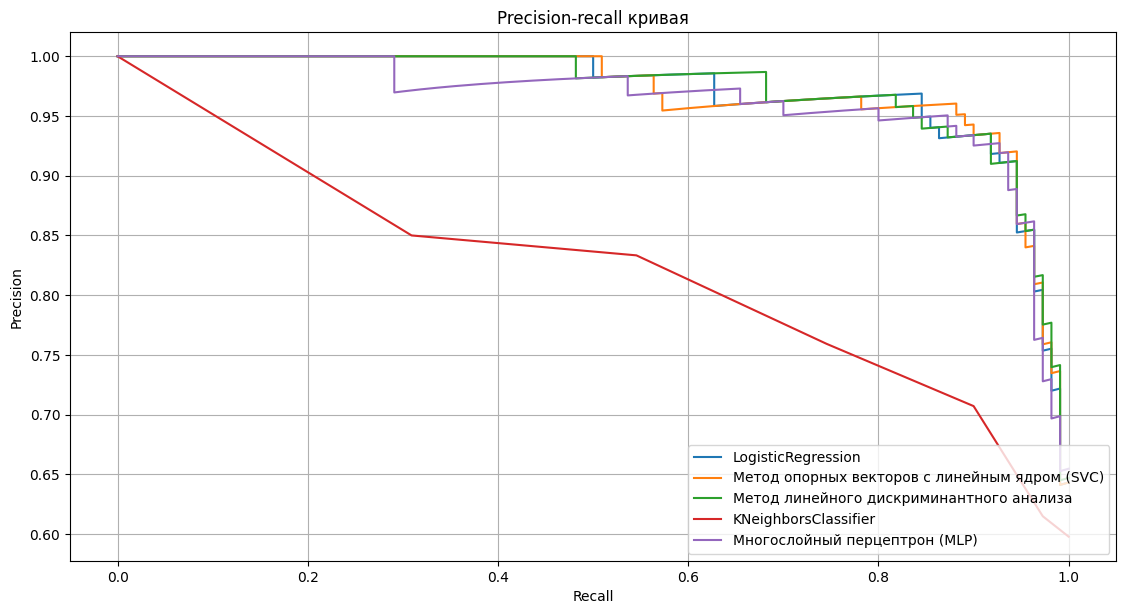

In [ ]:
# Определяем методы
learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel='linear', probability=True),
    "Метод линейного дискриминантного анализа": LinearDiscriminantAnalysis(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter=300)
}

# Построим график precision-recall кривой
plt.figure(figsize=(13.5, 7), dpi=100)

for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
  
    y_score = model.predict_proba(x_test)[:, 1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    plt.plot(recall, precision, label=f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.title('Precision-recall кривая')

plt.show()  

**2. Оцените эффективность моделей при помощи показателя average precision.**

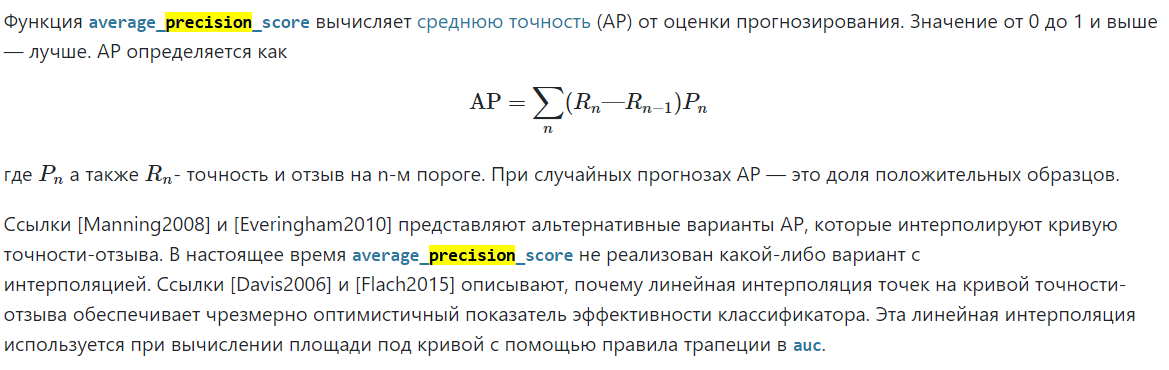

In [ ]:
average_precision_score(y_test, y_score)

0.9625768965870687

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score,Average_precision_score
0,LogisticRegression,0.902174,0.899802,0.896069,0.897816,0.970807
1,Метод опорных векторов с линейным ядром (SVC),0.907609,0.904665,0.902826,0.903715,0.970116
2,Метод линейного дискриминантного анализа,0.902174,0.899802,0.896069,0.897816,0.972114
3,KNeighborsClassifier,0.706522,0.695419,0.697052,0.696147,0.781862
4,Многослойный перцептрон (MLP),0.885870,0.883522,0.878010,0.880501,0.963440
